<a href="https://colab.research.google.com/github/jagadeeshreddy561/-Alpha-beta-pruning-of-Minimax-Search-Algorithm/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X=torch.linspace(1,50,70).reshape(-1,1)

In [ ]:
torch.manual_seed(71)
e=torch.randint(-8,9,(70,1),dtype=torch.float)
print(e.sum())

tensor(-5.)


In [ ]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([70, 1])


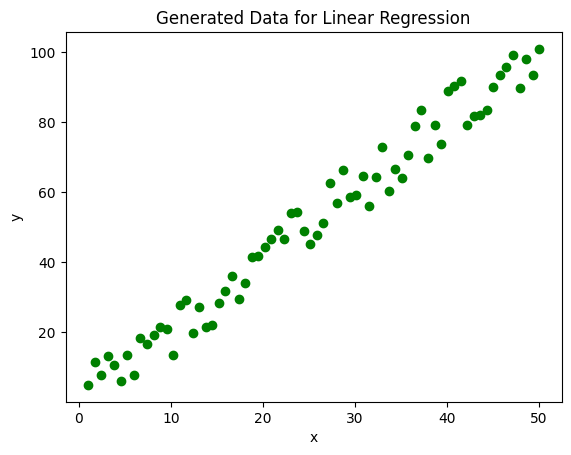

In [ ]:
plt.scatter(X.numpy(), y.numpy(),color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [ ]:
torch.manual_seed(59)
model=nn.Linear(1,1)
print("weights:",model.weight.item())
print("Bias:",model.bias.item())

weights: 0.10597813129425049
Bias: 0.9637961387634277


In [ ]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
epochs = 50
losses = []

for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.weight.item():10.8f}  '
          f'bias: {model.bias.item():10.8f}')


epoch:  1  loss: 3055.77441406  weight: 3.32828999  bias: 1.06032085
epoch:  2  loss: 1568.51586914  weight: 1.02822447  bias: 0.99231458
epoch:  3  loss: 810.77264404  weight: 2.66995072  bias: 1.04174769
epoch:  4  loss: 424.71047974  weight: 1.49808407  bias: 1.00735390
epoch:  5  loss: 228.01576233  weight: 2.33451891  bias: 1.03279400
epoch:  6  loss: 127.80177307  weight: 1.73745751  bias: 1.01552510
epoch:  7  loss: 76.74358368  weight: 2.16360450  bias: 1.02874088
epoch:  8  loss: 50.72985458  weight: 1.85940063  bias: 1.02019668
epoch:  9  loss: 37.47603607  weight: 2.07651043  bias: 1.02718401
epoch: 10  loss: 30.72321701  weight: 1.92151415  bias: 1.02308476
epoch: 11  loss: 27.28257942  weight: 2.03212166  bias: 1.02689850
epoch: 12  loss: 25.52949142  weight: 1.95314527  bias: 1.02506363
epoch: 13  loss: 24.63618088  weight: 2.00949121  bias: 1.02726018
epoch: 14  loss: 24.18091774  weight: 1.96924579  bias: 1.02657878
epoch: 15  loss: 23.94883537  weight: 1.99794590  bias

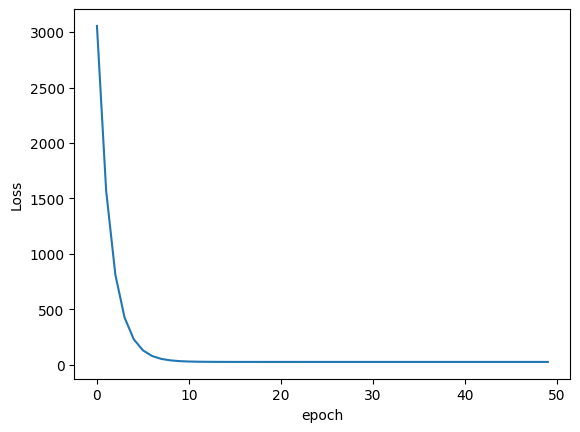

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()

In [ ]:
x1 = torch.tensor([X.min().item(), X.max().item()])
w1, b1 = model.weight.item(), model.bias.item()
#y1
y1 = x1 * w1 + b1

In [ ]:
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')

Final Weight: 1.98545170, Final Bias: 1.04553115
X range: [ 1. 50.]
Predicted Y values: [  3.030983 100.318115]


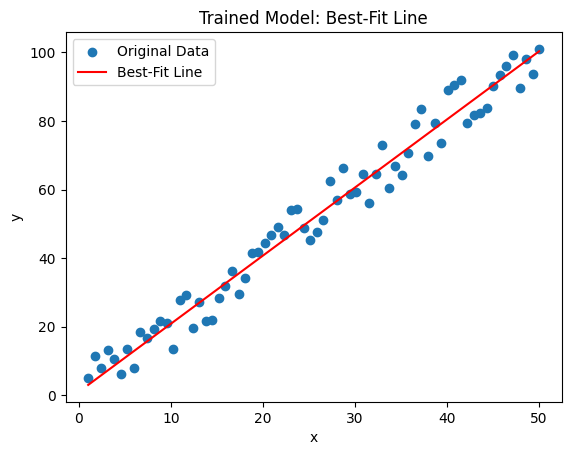

In [ ]:
plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()